In [3]:
from library_dicom.dicom_processor.tools.visualization.create_mip import *
import SimpleITK as sitk 

In [2]:
pet_nifti_path = r'C:\Users\wendy\Documents\STAGE\PET0\1.2.250.1.74.20120625133000.1000031365770_nifti_PT.nii'
mask_nifti_path = r'C:\Users\wendy\Documents\STAGE\PET0\1.2.250.1.74.20120625133000.1000031365770_nifti_mask_3d.nii'
ct_nifti_path = r'C:\Users\wendy\Documents\STAGE\PET0\1.2.250.1.74.20120625133000.1000031365770_nifti_CT.nii'

In [3]:
pet_img = sitk.ReadImage(pet_nifti_path)
mask_img = sitk.ReadImage(mask_nifti_path)
ct_img = sitk.ReadImage(ct_nifti_path)

print('PET img size :', pet_img.GetSize())
print('MASK img size :', mask_img.GetSize())
print('CT img size :', ct_img.GetSize())

pet_array = sitk.GetArrayFromImage(pet_img)
mask_array = sitk.GetArrayFromImage(mask_img)
ct_array = sitk.GetArrayFromImage(ct_img)

print('')
print('PET array shape :', pet_array.shape)
print('MASK array shape :', mask_array.shape)
print('CT array shape :', ct_array.shape)

PET img size : (128, 128, 287)
MASK img size : (128, 128, 287)
CT img size : (512, 512, 287)

PET array shape : (287, 128, 128)
MASK array shape : (287, 128, 128, 4)
CT array shape : (287, 512, 512)


In [ ]:
#(z,rows,columns)
#(z,y,x)
mip_pet_mask_projection(pet_array=pet_array, mask_array=mask_array, angle=90, study_uid='123', cmap_pet='gray', cmap_mask='hsv', alpha=0.5, vmin=0, vmax=10, directory_path=None)

In [4]:
from library_dicom.dicom_processor.model.post_processing.Watershed import Watershed 
from library_dicom.dicom_processor.tools.preprocessing.threshold_mask import *
mask_array = threshold_matrix(mask_array, pet_array, 0.41)
mask_array = np.amax(mask_array, axis = -1)
binary_img = sitk.GetImageFromArray(mask_array)
binary_img.SetSpacing(pet_img.GetSpacing())
binary_img.SetDirection(pet_img.GetDirection())
binary_img.SetOrigin(pet_img.GetOrigin())


In [5]:
seg = Watershed(binary_img, pet_img).applied_watershed_model()

In [6]:
seg.shape

(287, 128, 128)

In [7]:
np.max(seg)

5

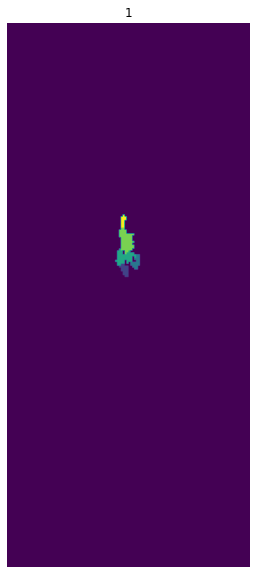

In [8]:
mip_projection(numpy_array=seg, angle=0, study_uid='1', type='mask', cmap='viridis', vmin=0, vmax=0, directory_path=None)

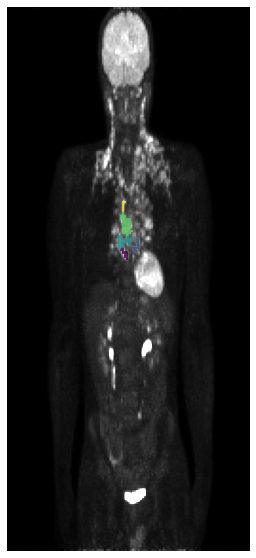

In [9]:
mip_pet_mask_projection(pet_array=pet_array, mask_array=seg, angle=0, study_uid='123', cmap_pet='gray', cmap_mask='viridis', alpha=0.8, vmin=0, vmax=10, directory_path=None)

In [ ]:
mip_superposition_gif(pet_array=pet_array, mask_array=seg, study_uid='1', cmap_pet='gray', cmap_mask='viridis', vmin=0, vmax=10,alpha=0.9, directory=r'C:\Users\wendy\Documents\STAGE\PET0', name='test')

In [1]:
from library_dicom.dicom_processor.model.reader.Nifti import Nifti 
from library_dicom.dicom_processor.model.reader.MIP_Builder import MIP_Builder
import SimpleITK as sitk
import numpy as np

ct_nifti_path = r'C:\Users\wendy\Documents\STAGE\PET0\1.2.250.1.74.20120625133000.1000031365770_nifti_CT.nii'

objet = Nifti(ct_nifti_path)
array = objet.resample_and_normalize(mode='ct')
builder = MIP_Builder(array)
builder.save_mip(0, '1', r'C:\Users\wendy\Documents\STAGE\PET0')

'C:\\Users\\wendy\\Documents\\STAGE\\PET0\\1_mip_ct_0.png'

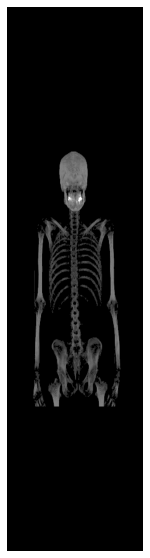

In [2]:
from library_dicom.dicom_processor.tools.visualization.create_mip import *
mip_projection(numpy_array=array, angle=0, study_uid='1', type='mask', cmap='gray', vmin=0, vmax=0, directory_path=None)